In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('winequality-red.csv')
df2=pd.read_csv('stud.csv')

Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

In [3]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

the key features of the wine quality dataset and their importance in predicting wine quality are as follows:

Fixed Acidity: Important for balanced taste.

Volatile Acidity: Important to avoid off-flavors.

Citric Acid: Enhances freshness and fruitiness.

Residual Sugar: Affects sweetness and balance.

Chlorides: Influence taste and mouthfeel.

Free Sulfur Dioxide: Preserves and stabilizes wine.

Total Sulfur Dioxide: Measures overall sulfur content.

Density: Relates to sugar and alcohol levels.

pH: Affects chemical reactions and stability.

Sulphates: Contribute to aroma and stability.

Alcohol: Influences body and balance.

Quality (Target Variable): The primary feature of interest, indicating overall wine quality.

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

ans->Handling missing data is a crucial step in the feature engineering process. In the wine quality dataset or any dataset, missing data can negatively impact the quality of analysis and machine learning models. There are several techniques to handle missing data, each with its own advantages and disadvantages. Here are some common approaches and their pros and cons:

1. **Removal of Rows with Missing Data (Listwise Deletion)**:
   - **Advantages**:
     - Simple and easy to implement.
     - Does not require making assumptions about the data.
   - **Disadvantages**:
     - May lead to a significant loss of data, especially if missing values are common.
     - Can introduce bias if missing data is not completely random.

2. **Mean/Median/Mode Imputation**:
   - **Advantages**:
     - Simple and quick to implement.
     - Preserves the structure of the dataset.
   - **Disadvantages**:
     - Ignores the uncertainty associated with imputed values.
     - Can distort the distribution of the data, especially for variables with many missing values.
     - May not be suitable if the data has outliers.

3. **Forward Fill or Backward Fill**:
   - **Advantages**:
     - Appropriate for time series data where missing values follow a temporal pattern.
     - Maintains temporal order.
   - **Disadvantages**:
     - May not be suitable for non-time series data.
     - Imputed values can be biased if there is no temporal pattern.

4. **Interpolation**:
   - **Advantages**:
     - Can provide more accurate estimates by considering neighboring values.
     - Works well for data with a natural order or sequence.
   - **Disadvantages**:
     - Requires more computational effort.
     - May not be suitable for categorical data or data with irregular patterns.



Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

In [4]:
df2.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df2['total_score']=df2['math_score']+df2['reading_score']+df2['writing_score']
df2['AVG']=df2['total_score']/3
df2.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,AVG
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


/tmp/ipykernel_1132/3088159180.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/tmp/ipykernel_1132/3088159180.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
/tmp/ipykernel_1132/3088159180.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


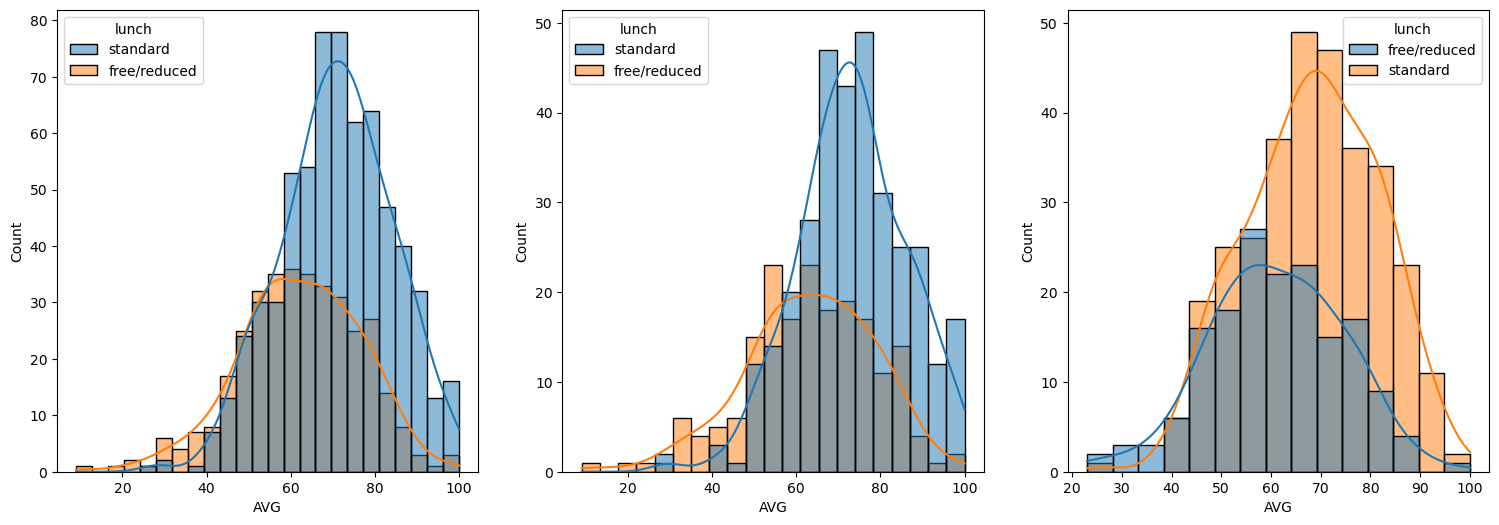

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df2,x='AVG',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df2[df2.gender=='female'],x='AVG',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df2[df2.gender=='male'],x='AVG',kde=True,hue='lunch')
plt.show()

Standard Lunch help students perform well in exams
Standard lunch helps perform well in exams be it a male of female

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

ans->

1. **Feature Selection**:
   - Choose relevant variables that may impact exam performance, such as gender, parental education, test preparation, etc.

2. **Data Transformation**:
   - Convert categorical variables into a numerical format (e.g., one-hot encoding).
   - Map ordinal variables to numerical values reflecting their order.

3. **Feature Creation**:
   - Create new features if they capture important information (e.g., composite score).

4. **Scaling and Normalization**:
   - Scale or normalize numeric features to ensure similar scales if needed.

5. **Handling Correlation**:
   - Check for highly correlated features and consider removing one if necessary.

6. **Final Feature Set**:
   - After transformations, you have a final set of features for your machine learning model.

The goal is to prepare and engineer features that help improve model performance and capture underlying patterns in the data.

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

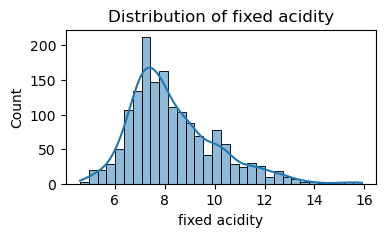

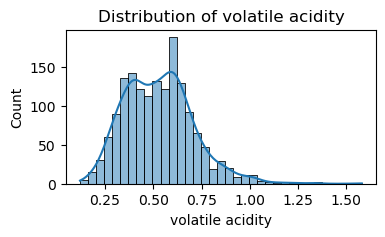

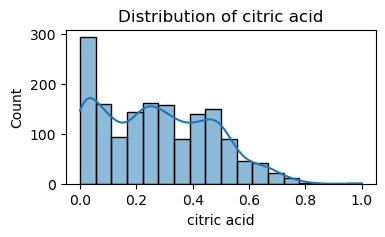

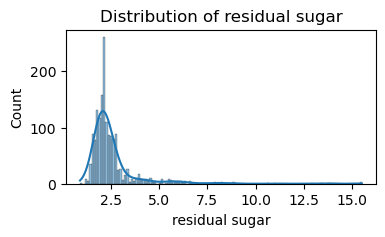

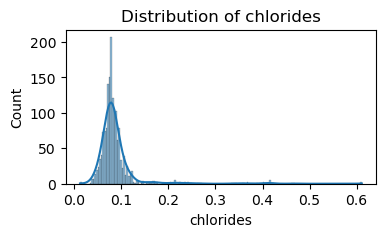

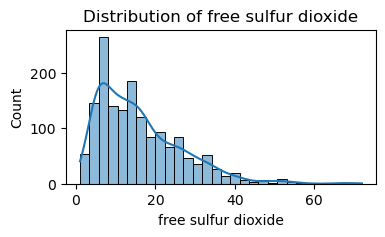

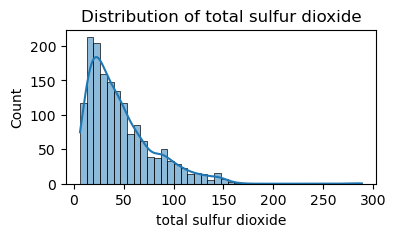

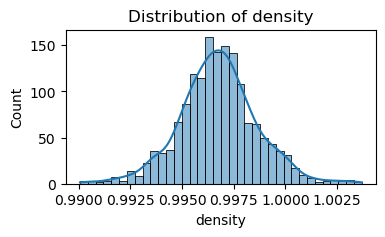

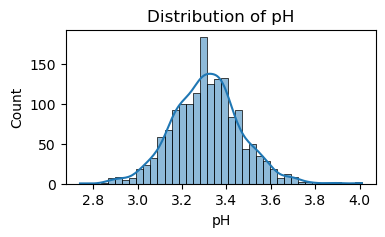

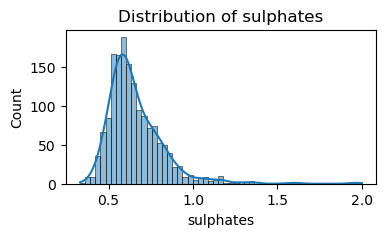

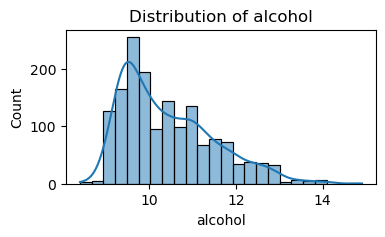

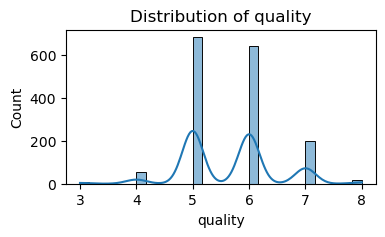

In [30]:
for feature in df1.columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(data=df1, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

the following features exhibit non-normal distributions based on visual inspection: volatile acidity, citric acid,free sulfur dioxide, total sulfur dioxide,pH,alcohol,quality

to Improve Normality we can use Log Transformation,Square Root Transformation,Box-Cox Transformation etc

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

Minimum number of components to explain 90% of variance: 7


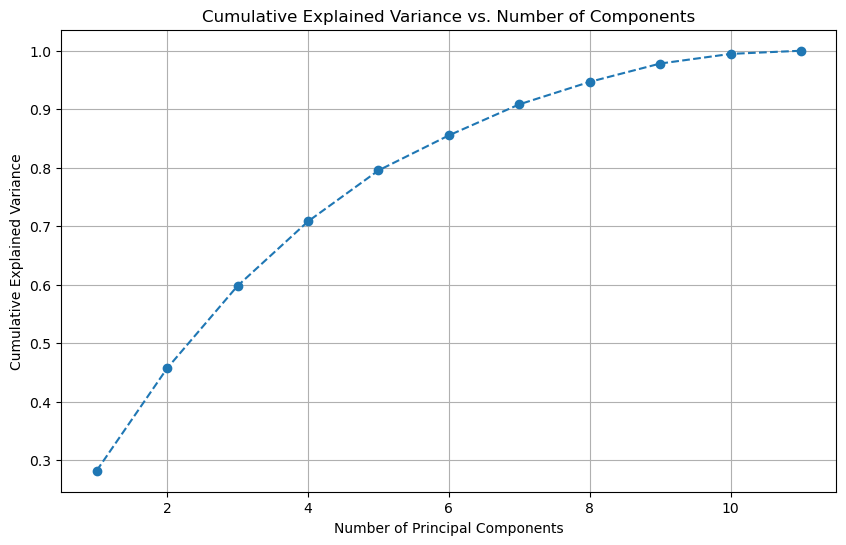

In [36]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
wine_data = pd.read_csv("winequality-red.csv")
X = wine_data.drop('quality', axis=1)
X_std = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Calculate the cumulative explained 
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the minimum number of components to explain 90% of the variance
num_components_90_percent_variance = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Minimum number of components to explain 90% of variance: {num_components_90_percent_variance}")

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()
